<h7> Modules & Packages.

In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf 

from datetime import datetime

import statsmodels.api as sm
import matplotlib.pyplot as plt

<h7> Data collecting.

In [5]:
ticker = input("Which crypto would you like to test? Type format: NAME-USD")

start = "2023-01-01"
end = datetime.today().strftime('%Y-%m-%d')

prices = yf.download(ticker, start, end)['Close']

#inputting the parameters
r_0 = int(len(prices)*0.1)

#specify lags for the augmented Dickey-Fuller (ADF) test

adf_lags = 3
#critical value of the right-tailed ADF-test (95%) from Phillips et al. (2015)

crit = 1.49
#transforming data

log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]
n = len(delta_log_prices)
BSADF = np.array([])

#calculating ADF stats

for r_2 in range(r_0,n):
    ADFS = np.array([])
    for r1 in range(0,r_2- r_0 + 1):
        X0 = log_prices[r_1 : r_2 + 1]
        X = pd.DataFrame()
        X[0] = X0
        for j in range(1,adf_lags+1):
            X[j] = np.append(np.zeros(j),delta_log_prices[r_1:r_2+1-j])
        X = np.array(X)
        Y = delta_log_prices[r_1 : r_2 + 1]
        reg = sm.OLS(Y,sm.add_constant(X))
        res = reg.fit()
        ADFS = np.append(ADFS, res.params[1]/res.bse[1])
    BSADF = np.append(BSADF, max(ADFS))


[*********************100%***********************]  1 of 1 completed


<h7> Visualization.

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


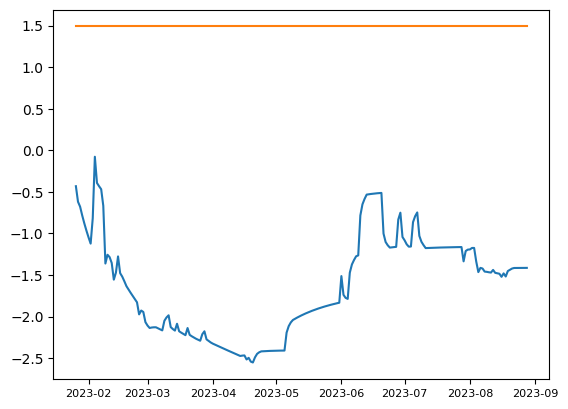

In [6]:
plt.rc('xtick',labelsize = 8)
plt.plot(prices.index[r0+1:],BSADF)
plt.plot(prices.index[r0+1:],np.ones(len(BSADF))*crit)
#printing dates when bubbles were detected
print(prices.index[r0+1:][BSADF > crit])

In [ ]:
#-- Parameters
r_0 = int(len(prices) * 0.1)

#-- Lags for the augmented Dickey-Fuller test
aug_df_lags = 3

#-- Critical value of the right tailed ADF -test from Philips et al.(2015)
crit = 1.49

#-- Data transformation

log_prices = np.array(np.log(prices))
delta_log_prices = log_prices[1:] - log_prices[:-1]

n = len(delta_log_prices)

bsadf = np.array([])

#-- Augmented Dickey Fuller stats calculation
for r_2 in range(r_0, n):
    ADFS = np.array([])
    for r_1 in range(0, r_2 - r_0 + 1):
        x_0 = log_prices[r_1 : r_2 + 1]
        X = pd.DataFrame()
        X[0] = x_0
        for j in range(1, aug_df_lags + 1):
            X[j] = np.append(np.zeros(j), delta_log_prices[r_1, r_2 + 1 - j])
        
        X = np.array(X)

        Y = delta_log_prices[r_1 :r_2 + 1]
        reg = sm.OLS(Y, sm.add_constant(X))
        res = reg.fit()
        ADFS = np.append(bsadf, max(ADFS))
    bsadf = np.append(bsadf, max(ADFS))